# Random Forest Classifier with data from PCA

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_df = pd.read_csv("/Users/sarabinder/Desktop/To_Do/Wichtig/rf_test/complete_df.csv", index_col=0)

for i in range(len(data_df)):
    data_df.iloc[i,-1] =  data_df.iloc[i,-1].split("_rois")[0]

data_df = data_df.rename(columns = {"ID": "FILE_ID"})


pheno_df = pd.read_csv("/Users/sarabinder/Desktop/To_Do/Wichtig/rf_test/Phenotypic_V1_0b_preprocessed1.csv", index_col = 0)
diagnose_df = pheno_df.loc[:,["FILE_ID", "DX_GROUP", "DSM_IV_TR"]]


data_merged_df = pd.merge(data_df, diagnose_df, on = "FILE_ID", how = "left")
data_merged_df = data_merged_df.dropna()

In [6]:
# Separate features and target
X = data_merged_df.drop(["FILE_ID", "DX_GROUP", "DSM_IV_TR"], axis=1)
y = data_merged_df["DX_GROUP"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# alternatively: read in test and traininng data on which pca has been run
X_train = pd.read_csv("/Users/sarabinder/Desktop/To_Do/Wichtig/rf_test/X_train_pca.csv", index_col=0)
X_test = pd.read_csv("/Users/sarabinder/Desktop/To_Do/Wichtig/rf_test/X_test_pca.csv", index_col=0)

Confusion Matrix:
[[  9 104]
 [  8 134]]
Classification
              precision    recall  f1-score   support

           1       0.53      0.08      0.14       113
           2       0.56      0.94      0.71       142

    accuracy                           0.56       255
   macro avg       0.55      0.51      0.42       255
weighted avg       0.55      0.56      0.45       255

Accuracy
0.5607843137254902


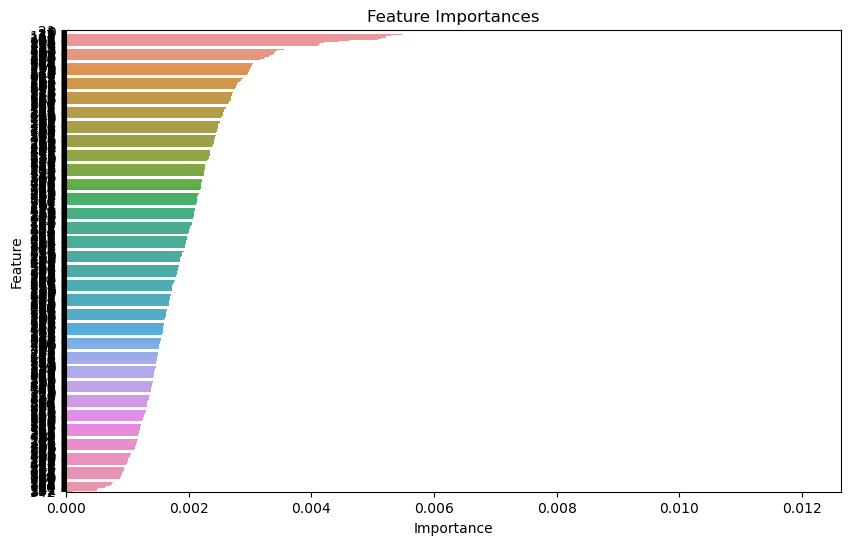

In [11]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification")
print(classification_report(y_test, y_pred))
print("Accuracy")
print(accuracy_score(y_test, y_pred))

feature_importances = rf.feature_importances_
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.show()

This looks crazy because we have so many predictors :D I plotted only the 50 most important ones below, but this is obviously not a final solution.

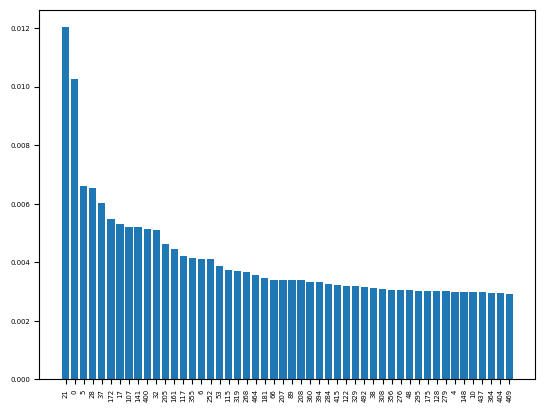

In [13]:

plt.bar(x=importances_df[:50]['Feature'], height=importances_df[:50]['Importance'])

plt.xticks(fontsize=5, rotation=90)
plt.yticks(fontsize=5)

plt.show()